In [15]:
##############################################
# Modeling    
##############################################
 
from tensorflow.keras import layers, models
from sklearn import preprocessing

def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    """ Keras 모델 시작 """

    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    """입력 계층 노드 수 Nin 개,  은닉 계층의 노드 수 Nh 개, 활성함수는 relu  """

    model.add(layers.Dense(Nout, activation='relu'))
    """출력 노드 수 Nout 개,  활성함수는  relu) """

    model.compile(loss='mse', optimizer='sgd')
    """ cost함수 - mse – 평균 제곱 오차  최적화  알고리즘 -SGD(확률적 경사하강법) 
    """

    return model

(404, 13) (404,)
Epoch 1/100
4/4 - 0s - loss: 544.2637 - val_loss: 282.9315 - 431ms/epoch - 108ms/step
Epoch 2/100
4/4 - 0s - loss: 146.9783 - val_loss: 124.8780 - 35ms/epoch - 9ms/step
Epoch 3/100
4/4 - 0s - loss: 87.0329 - val_loss: 73.0551 - 33ms/epoch - 8ms/step
Epoch 4/100
4/4 - 0s - loss: 66.1903 - val_loss: 70.3971 - 33ms/epoch - 8ms/step
Epoch 5/100
4/4 - 0s - loss: 63.0672 - val_loss: 86.8184 - 33ms/epoch - 8ms/step
Epoch 6/100
4/4 - 0s - loss: 76.6318 - val_loss: 95.7206 - 55ms/epoch - 14ms/step
Epoch 7/100
4/4 - 0s - loss: 57.3777 - val_loss: 55.9240 - 55ms/epoch - 14ms/step
Epoch 8/100
4/4 - 0s - loss: 47.2140 - val_loss: 52.7090 - 33ms/epoch - 8ms/step
Epoch 9/100
4/4 - 0s - loss: 45.0136 - val_loss: 60.4255 - 63ms/epoch - 16ms/step
Epoch 10/100
4/4 - 0s - loss: 59.6414 - val_loss: 47.9971 - 49ms/epoch - 12ms/step
Epoch 11/100
4/4 - 0s - loss: 41.3589 - val_loss: 55.9409 - 39ms/epoch - 10ms/step
Epoch 12/100
4/4 - 0s - loss: 70.2109 - val_loss: 41.3290 - 58ms/epoch - 15ms/

2/2 [==============================] - 0s 0s/step - loss: 24.7460

Test Loss -> 24.75


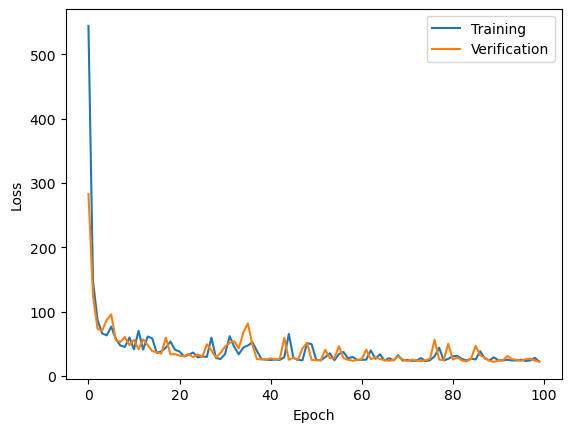

In [21]:
##############################################
# Data  학습과 평가용 데이터 불러오기 
##############################################

from tensorflow.keras import datasets

def Data_func():  
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()# 데이터 정규화  
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    print (X_train.shape, y_train.shape )
    
    return (X_train, y_train), (X_test, y_test)

##############################################
# Plotting  결과 그래프 구현 
##############################################
import matplotlib.pyplot as plt
%matplotlib inline 
##############################################
# Main  회귀 ANN 학습 및 성능 분석 
##############################################
def main():
    Nin = 13
    Nh = 5
    Nout = 1

    model = ANN_seq_func(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    
    history = model.fit(X_train, 
                        y_train, 
                        epochs = 100, 
                        batch_size=100,
                        validation_split = 0.2, 
                        verbose=2
                       )
    
    performace_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performace_test))

    history = history.history

    """Cost/Loss  변화 추이 그래프"""
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()


if __name__ == '__main__':
    main()
